In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
#We have set num_words to 20000. Hence only 20000 most frequent words are kept. 
#The maximum possible index value is num_words – 1
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

17465344/17464789 [==============================] - 11s 1us/step


In [16]:
#PREVIEW
X_train[0:1][0:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [17]:
#The length of all the reviews must be same before feeding them to the neural network.
#Hence we are using pad_sequences which pads zeros to reviews with length less than 100
X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen=100)

In [18]:
#25000 rows and 100 columns
print(X_train.shape)
print(X_test.shape)

(25000, 100)
(25000, 100)


In [19]:
vocab_size = 20000
embed_size = 128

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 24s 120ms/step - loss: 0.4310 - accuracy: 0.7910 - val_loss: 0.3358 - val_accuracy: 0.8533
Epoch 2/5
196/196 [==============================] - 24s 122ms/step - loss: 0.2332 - accuracy: 0.9112 - val_loss: 0.3753 - val_accuracy: 0.8348
Epoch 3/5
196/196 [==============================] - 25s 130ms/step - loss: 0.1560 - accuracy: 0.9435 - val_loss: 0.4005 - val_accuracy: 0.8396
Epoch 4/5
196/196 [==============================] - 25s 130ms/step - loss: 0.0966 - accuracy: 0.9676 - val_loss: 0.4807 - val_accuracy: 0.8368
Epoch 5/5
196/196 [==============================] - 27s 137ms/step - loss: 0.0623 - accuracy: 0.9792 - val_loss: 0.5979 - val_accuracy: 0.8330


In [21]:
history.history

{'loss': [0.4310099482536316,
  0.23321999609470367,
  0.15595319867134094,
  0.0966288149356842,
  0.062251485884189606],
 'accuracy': [0.7909600138664246,
  0.9112399816513062,
  0.9435200095176697,
  0.9675999879837036,
  0.979200005531311],
 'val_loss': [0.3357548117637634,
  0.37531062960624695,
  0.4005184471607208,
  0.4807191789150238,
  0.5979493856430054],
 'val_accuracy': [0.8532800078392029,
  0.8348000049591064,
  0.8396000266075134,
  0.8367599844932556,
  0.8330399990081787]}

In [22]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

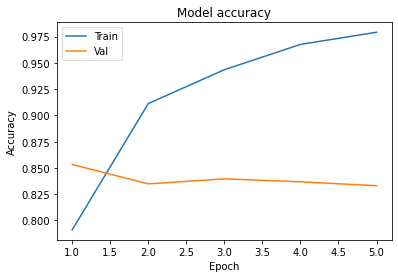

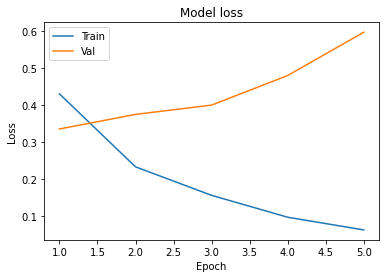

In [24]:
plot_learningCurve(history, 5)